# **Convolutional Neural Networks**

In [ ]:
# Imports from Video 10 - Image Preparation for Convulutional Neural Networks with TensorFlow's Keras API
# Source link: https://www.youtube.com/watch?v=_L2uYfVV48I&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=11&t=222s

import numpy as np # linear algebra
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Data Preparation - Video11 (Image Preparation for Convolutional Neural Networks with TensorFlow's Keras API)**

The images included in the /kaggle/input/dogs-vs-cats directory are a random subset of the full cat and dog data set from the following Kaggle competition: https://www.kaggle.com/competitions/dogs-vs-cats/data

In [ ]:
# Organize data into train, valid, test dirs (directories)

# Change the working directory to '/kaggle/working'
os.chdir('/kaggle/working')

# Define the source directory in the input path
source_directory = '/kaggle/input/sample-dataset-1/dogs-vs-cats'

if os.path.isdir('my_dataset') is False:
    # Copy the entire source directory to the working directory
    shutil.copytree(source_directory, 'my_dataset') 

# In separate notebook to lessen input data
# if os.path.isdir('train/dog') is False:
#     os.makedirs('train/dog')
#     os.makedirs('train/cat')
#     os.makedirs('valid/dog')
#     os.makerdirs('valid/cat')
#     os.makedirs('test/dog')
#     os.makedirs('test/cat')
    
    
#     for c in random.sample(glob.glob('cat*'), 500):
#         shutil.move(c, 'train/cat')
#     for c in random.sample(glob.glob('dog*'), 500):
#         shutil.move(c, 'train/dog')
#     for c in random.sample(glob.glob('cat*'), 100):
#         shutil.move(c, 'valid/cat')
#     for c in random.sample(glob.glob('dog*'), 100):
#         shutil.move(c, 'valid/dog')
#     for c in random.sample(glob.glob('cat*'), 50):
#         shutil.move(c, 'test/cat')
#     for c in random.sample(glob.glob('dog*'), 50):
#         shutil.move(c, 'test/dog')


In [ ]:
train_path = '/kaggle/working/my_dataset/train'
valid_path = '/kaggle/working/my_dataset/valid'
test_path = '/kaggle/working/my_dataset/test'

In [ ]:
print(os.path.isdir(train_path))
print(os.path.isdir(valid_path))
print(os.path.isdir(test_path))

In [ ]:
# Create batches of data passed to Sequential Model
# Preprocessing images to same format to as images get passed to vgg16 model
# Provided classes for one-hot encoding
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

## **Build and train a CNN - Video12 (Build and Train a Convolutional Neural Network with TensorFlow's Keras API)**

In [ ]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(units=2, activation='softmax'),
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

## **Predict - Video14 (Convolutional Neural Network Predictions with TensorFlow's Keras API)**

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape [0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[17 33]
 [ 7 43]]


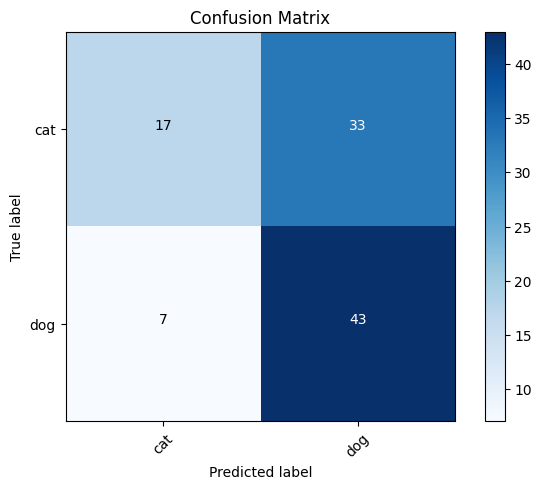

In [28]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')